# Assignment 1 (shortened)

This notebook contains three exercises from the exercise sets we covered prior to moving the teaching online. It will count as one of the two assignments you need to submit to qualify for the exam. **The deadline** for handing in this assignment is **April 3.** You hand in by pushing your solutions to your folder in the exercise repo.

## Problems from exercise set 2
> **Ex. 2.1.1**: The performance of a random forest classifier is highly sensitive to hyper parameters. Therefore, you should be intimately familiar with what the most important ones do. For each point below, explain what the hyper parameter pertaining to `sklearn.ensemble.RandomForestClassifier` controls, and how setting it either too low or too high (or True/False) might hurt model performance:
1. `n_estimators`
2. `max_depth`
3. `max_features`
4. `bootstrap`

###### Solution

**1. `n_estimators`:** Specifies the number of trees in the forest. Setting `n_estimators` at a high value increases performance, but also increases the risk of overfitting. On the other hand, specifying a too low value decreases the accuracy of the estimator as the variance increases. 

**2. `max_depth`:** Specifies the maximum depth of the tree, i.e. how many splits can be formed. The more splits, the more information about the data is captured, yet it also increases the variance.

**3. `max_features`:** Sets the number of features that are considered when looking for splits.

**4. `bootstrap`:** Specifies whether or not the the samples are bootstrapped when estimating each tree. If False, all of the data in the sample is used to fit the model.

> **Ex. 2.1.2**: For `n_estimators > 1`how should one set the hyper-parameters `max_features` and `bootstrap` so that all the trees in the ensemble end up identical?

###### Solution
Set `max_features = n_estimators` and `bootstrap = false` in order for all the trees in the ensemble to end up identical.

## Problems from exercise set 3

> **Ex. 3.1.2**: Reproduce the figure from the slides that compares PCA, LDA, t-SNE and UMAP as applied to the digits dataset.
1. Do it for the digits dataset (same as in slides)
2. Do it also for the wine dataset. What problems do you observe if you don't standardize the wine dataset? Why is this not a problem with the digits data?
3. Comment on the differences you observe as well as the applicability (and necessity thereof) of different methods for different data.
>
> *Hint: You can use [this class](https://github.com/ulfaslak/ulf_pytools/blob/7f4f1eb7e2d721851c8dacb20904478b19090f2a/ulf.py#L451) for making coloring easier. It lets you create a function that takes a category as input and returns an associated color. Read the docstring for usage example.*

In [4]:
# Solution
# LOADING DATA AND LIBRARIES
import pandas as pd
from sklearn.datasets import load_wine
from sklearn.datasets import load_digits
from umap import UMAP
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.manifold import TSNE

# GET WINE DATA
data_wine = load_wine()
X_wine = data_wine['data']
Y_wine = data_wine['target']

# GET DIGITS DATA
data_digits = load_digits()
X_digits = data_digits['data']
Y_digits = data_digits['target']

In [39]:
# DEFINING THE FUNCTION
def plot(X, y, reducer_type, ax, standardize=True): # for lack of better name of function
    if reducer_type == LDA:
        reducer = reducer_type()
        X_trans = reducer.fit_transform(X,y)
    else:
        reducer = reducer_type()
        X_trans = reducer.fit_transform(X)
        
    d1, d2 = X_trans[:,0], X_trans[:,1]

    ax.scatter(d1, d2, c = y)
    ax.set_title(reducer_type.__name__)

/Users/ErikSchou/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


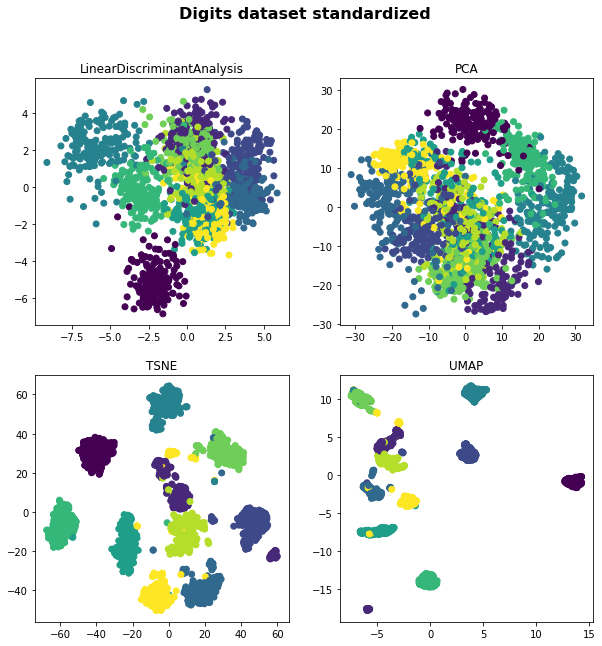

In [40]:
# 1. PLOTTING THE DIGITS DATASET STANDARDIZED
fig, ax = plt.subplots(2, 2, figsize=(10,10))
fig.suptitle('Digits dataset standardized', fontsize=16, fontweight='bold')
plot(X_digits, Y_digits, LDA, ax[0,0])
plot(X_digits, Y_digits, PCA, ax[0,1])
plot(X_digits, Y_digits, TSNE, ax[1,0])
plot(X_digits, Y_digits, UMAP, ax[1,1])

/Users/ErikSchou/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


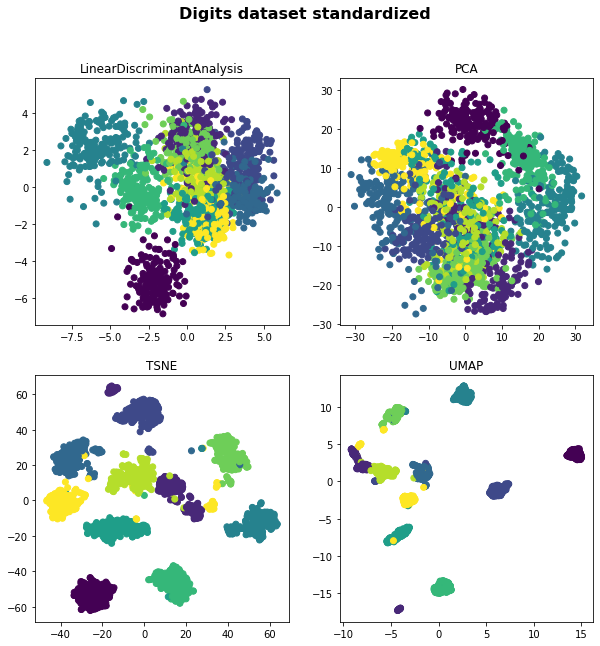

In [41]:
# 1. PLOTTING THE DIGITS DATASET NON-STANDARDIZED
fig, ax = plt.subplots(2, 2, figsize=(10,10))
fig.suptitle('Digits dataset non-standardized', fontsize=16, fontweight='bold')
plot(X_digits, Y_digits, LDA, ax[0,0], standardize=False)
plot(X_digits, Y_digits, PCA, ax[0,1], standardize=False)
plot(X_digits, Y_digits, TSNE, ax[1,0], standardize=False)
plot(X_digits, Y_digits, UMAP, ax[1,1], standardize=False)

*Question for Kristian: How do I deal with the fact that the variables are collinear, as indicated by the warning above?*

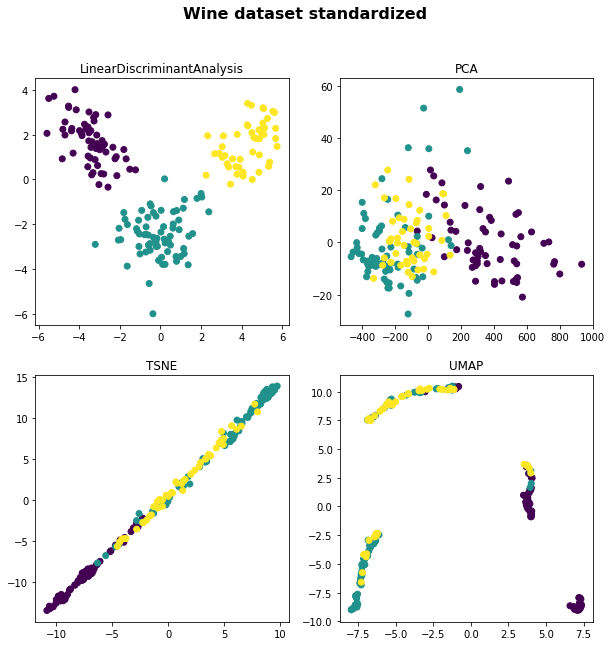

In [18]:
# 2. PLOTTING THE WINE DATASET STANDARDIZED
fig, ax = plt.subplots(2, 2, figsize=(10,10))
fig.suptitle('Wine dataset standardized', fontsize=16, fontweight='bold')
plot(X_wine, Y_wine, LDA,ax[0,0])
plot(X_wine, Y_wine, PCA,ax[0,1])
plot(X_wine, Y_wine, TSNE,ax[1,0])
plot(X_wine, Y_wine, UMAP,ax[1,1])

*Question for Kristian: Isn't something going wrong here, in that the TSNE and UMAP cluster/stick together? Isn't it supposed to be spread out more evenly?*

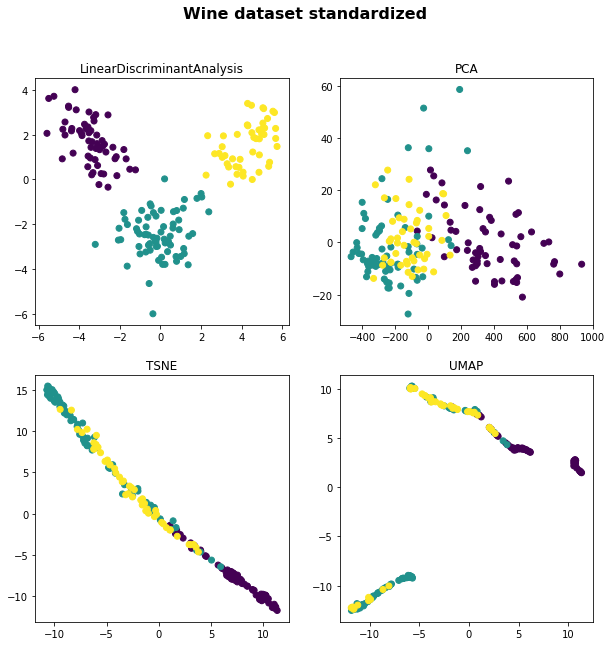

In [42]:
# 2. PLOTTING THE WINE DATASET NON-STANDARDIZED
fig, ax = plt.subplots(2, 2, figsize=(10,10))
fig.suptitle('Wine dataset non-standardized', fontsize=16, fontweight='bold')
plot(X_wine, Y_wine, LDA,ax[0,0], standardize=False)
plot(X_wine, Y_wine, PCA,ax[0,1], standardize=False)
plot(X_wine, Y_wine, TSNE,ax[1,0], standardize=False)
plot(X_wine, Y_wine, UMAP,ax[1,1], standardize=False)

###### 3. COMMENTS ON THE DIFFERENCES
The wine dataset utilize different scales for measuring. By not standardizing the wine dataset, the PCA, TSNE and UMAP all perform rather bad.

The digits dataset perform rather well, which could be attributed to it already having been standardized.

## Problems from exercise set 4

In this problem we will try to implement and understand some of the ideas used in [Athey, Imbens (2015)](https://www.pnas.org/content/pnas/113/27/7353.full.pdf) to develop _Honest Inference_ in desicion tree models. The paper begins by covering honesty in a setting of population averages, and for estimating conditional means; so you will need to look towards the second half of the paper to get an impression of it's use for treatment-effect estimation.

> **Ex. 4.2.1:** What does it mean that a tree is _honest?_ In particular what are the implications in terms of 
> * The intuition for why honesty is required in order to get good local treatment effect estimates?
> * The practical implementation of the DT algorithm?

###### Solution

A tree being *honest* means that the sample has been divided. In this way, it results in the model not using the same information for both selecting the model structure, i.e. growing the tree and splitting, and for estimating the effects, i.e. the effects at each split. If we did not use an honest approach, that is we used the same data for model selection and estimation instead of splitting it, it could result in correlations between covariates and the outcome. This would lead to biases, haltering our ability to carry out inference. 